# LC3 DATA INTEGRITY CHECK

In [1]:
# Libraries for general data management
import pandas as pd
import numpy  as np

In [2]:
# Pandas display options customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 12)
#pd.set_option('display.width', 200)

In [3]:
# Input file path (can be also an excel)
DATA_MERGED_PATH = './data/data_merged.ods'
DATA_FULL_PATH   = './data/data_full.ods'

In [4]:
# Read merged data skipping the first row and considering also '-' as NaN
data_merged = pd.read_excel(DATA_MERGED_PATH, skiprows=[0], na_values=['-'])

In [5]:
# Read full data and remove empty lines
data_full   = pd.read_excel(DATA_FULL_PATH,sheet_name='All data in rows')
data_full.dropna(how="all", inplace=True)

In [6]:
# Mean of measurements for each clay
# data_full.groupby('Clay').mean()

In [7]:
# Std of measurements for each clay
# data_full.groupby('Clay').std()

In [8]:
# Number of measurements for each clay and each day/total for each day
# data_full.groupby('Clay').count()
# data_full.groupby('Clay').count().sum()

### Points that fails in mean coherence

In [9]:
MAX_MEAN_DEVIATION = 0.1

In [10]:
data_merged_mean = data_merged[['Clay','1D','3D','7D','28D','90D']]

In [11]:
mean_check = pd.merge(data_full.groupby('Clay').mean(), data_merged_mean, on='Clay', how='inner')

In [12]:
mean_check[abs(mean_check['day_1'] - mean_check['1D']) > MAX_MEAN_DEVIATION][['Clay','day_1','1D']]

,Clay,day_1,1D
0,Argex,9.781250,10.406129
7,B45 India1 750°C,7.930208,13.183750
8,B45 India3 750°C,8.780208,9.403125
9,B45 Loma Sur,16.076667,10.081250
15,Chile,9.996875,10.635529
16,China Screened,9.857812,11.273438
35,Holcim 4 Brazil,11.620313,11.820312
41,Iran G1,9.225000,9.814343
43,Iran Z1,10.150000,10.798437
44,Iran Z2,9.765625,10.389506


In [13]:
mean_check[abs(mean_check['day_3'] - mean_check['3D']) > MAX_MEAN_DEVIATION][['Clay','day_3','3D']]

,Clay,day_3,3D
0,Argex,20.337500,20.749410
7,B45 India1 750°C,19.343750,30.173750
8,B45 India3 750°C,20.021250,21.560417
9,B45 Loma Sur,28.808333,23.618750
15,Chile,23.978125,24.463771
35,Holcim 4 Brazil,24.524219,26.196875
41,Iran G1,23.437500,23.912196
42,Iran G2,21.065625,21.492282
43,Iran Z1,20.543750,20.959837
44,Iran Z2,19.725000,20.124504


In [14]:
mean_check[abs(mean_check['day_7'] - mean_check['7D']) > MAX_MEAN_DEVIATION][['Clay','day_7','7D']]

,Clay,day_7,7D
0,Argex,28.475000,29.287255
7,B45 India1 750°C,23.430208,52.091250
8,B45 India3 750°C,26.027083,29.157500
9,B45 Loma Sur,37.821667,38.528750
15,Chile,40.906250,42.073108
20,F1,35.800000,35.027083
35,Holcim 4 Brazil,36.934375,37.764063
41,Iran G1,35.506250,36.519072
42,Iran G2,27.103125,27.876247
43,Iran Z1,34.875000,35.869816


In [15]:
mean_check[abs(mean_check['day_28'] - mean_check['28D']) > MAX_MEAN_DEVIATION][['Clay','day_28','28D']]

,Clay,day_28,28D
0,Argex,38.734375,41.275596
7,B45 India1 750°C,29.898958,64.031250
8,B45 India3 750°C,35.973958,37.515625
9,B45 Loma Sur,61.768333,49.446875
15,Chile,56.909375,60.642992
35,Holcim 4 Brazil,43.610937,42.168750
41,Iran G1,53.818750,57.349602
42,Iran G2,32.578125,34.715457
43,Iran Z1,53.209375,56.700249
44,Iran Z2,43.009375,45.831064


In [16]:
mean_check[abs(mean_check['day_90'] - mean_check['90D']) > MAX_MEAN_DEVIATION][['Clay','day_90','90D']]

,Clay,day_90,90D
0,Argex,41.350000,42.096173
7,B45 India1 750°C,31.226562,63.318750
8,B45 India3 750°C,37.582813,40.345312
9,B45 Loma Sur,79.115000,51.429688
10,B45 Suriname 2,59.929167,60.131520
15,Chile,59.381250,60.452803
35,Holcim 4 Brazil,44.936458,44.181250
40,India 2,60.047917,60.350000
41,Iran G1,53.831250,54.802651
42,Iran G2,35.087500,35.720665


### Points that fails in std coherence

In [17]:
MAX_STD_DEVIATION = 0.1

In [18]:
data_merged_std = data_merged[['Clay','STD','STD.1','STD.2','STD.3','STD.4']]

In [19]:
std_check = pd.merge(data_full.groupby('Clay').std(), data_merged_std, on='Clay', how='inner')

In [20]:
std_check[abs(std_check['day_1'] - std_check['STD']) > MAX_STD_DEVIATION][['Clay','day_1','STD']]

,Clay,day_1,STD
7,B45 India1 750°C,0.096454,0.566334
8,B45 India3 750°C,0.038205,0.189520
9,B45 Loma Sur,0.255943,0.153793
35,Holcim 4 Brazil,0.422323,0.299234


In [21]:
std_check[abs(std_check['day_3'] - std_check['STD.1']) > MAX_STD_DEVIATION][['Clay','day_3','STD.1']]

,Clay,day_3,STD.1
7,B45 India1 750°C,0.446217,0.726647
8,B45 India3 750°C,0.599065,1.963092
9,B45 Loma Sur,0.944233,1.293184
35,Holcim 4 Brazil,1.855020,0.428007


In [22]:
std_check[abs(std_check['day_7'] - std_check['STD.2']) > MAX_STD_DEVIATION][['Clay','day_7','STD.2']]

,Clay,day_7,STD.2
7,B45 India1 750°C,0.869540,1.006780
8,B45 India3 750°C,1.241865,0.868001
9,B45 Loma Sur,1.852279,0.531298
20,F1,0.141421,1.342461
35,Holcim 4 Brazil,1.560871,1.260419


In [23]:
std_check[abs(std_check['day_28'] - std_check['STD.3']) > MAX_STD_DEVIATION][['Clay','day_28','STD.3']]

,Clay,day_28,STD.3
7,B45 India1 750°C,0.677327,4.819113
9,B45 Loma Sur,0.817249,1.382842
35,Holcim 4 Brazil,2.083866,0.830333
54,Pontezuela,0.299016,0.583218
59,South Africa,0.406823,0.971274


In [24]:
std_check[abs(std_check['day_90'] - std_check['STD.4']) > MAX_STD_DEVIATION][['Clay','day_90','STD.4']]

,Clay,day_90,STD.4
7,B45 India1 750°C,1.133698,1.785445
8,B45 India3 750°C,0.329669,0.845567
35,Holcim 4 Brazil,1.091626,0.420147
40,India 2,2.351415,2.012739
54,Pontezuela,0.583218,1.266177
59,South Africa,0.971274,0.463920


### Dummy test of confidence improvement 

In [8]:
data_full = data_full[data_full.Clay !='B45 India1 750°C']
data_full = data_full[data_full.Clay !='B45 Loma Sur']
data_full = data_full[data_full.Clay !='Pontezuela']
#data_full

In [9]:
data_full

,Clay,day_1,day_3,day_7,day_28,day_90
1,B45 Quartz B250,7.69375,18.33125,26.13125,29.118750,29.38125
2,B45 Quartz B250,8.16875,19.20000,25.57500,28.456250,31.21875
3,B45 Quartz B250,7.95000,18.70625,27.03750,29.350000,30.25625
4,B45 Quartz B250,7.52500,18.70000,25.55000,29.750000,29.39375
5,B45 Quartz B250,7.70625,18.48125,NaN,NaN,NaN
...,...,...,...,...,...,...
266,Guinea 2,10.00000,23.73750,40.21250,49.993764,NaN
267,Guinea 2,9.96250,23.55000,39.75625,49.862183,NaN
269,Guinea 3,9.82500,20.15000,29.80000,39.903597,NaN
270,Guinea 3,9.05000,21.40625,32.18750,41.524118,NaN


In [10]:
data_clay   = pd.read_excel(DATA_FULL_PATH,sheet_name='Clays properties')

In [11]:
clay_alias  = pd.read_excel(DATA_FULL_PATH,sheet_name='Clays IDs')

In [12]:
#clay_alias
#data_clay

In [13]:
data_clay = pd.merge(data_clay, clay_alias, left_on='Clay',right_on='Clay_alias')

In [14]:
data_full_clay = pd.merge(data_full, data_clay, left_on='Clay', right_on='Clay_ID', how='left')

In [15]:
#data_full_clay.columns
data_28 = data_full_clay[['Calcined kaolinite content (%)', 'day_28']]
data_28 = data_28.dropna()
data_28 = data_28.sort_values('Calcined kaolinite content (%)')

In [16]:
# Libraries for data visualization
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


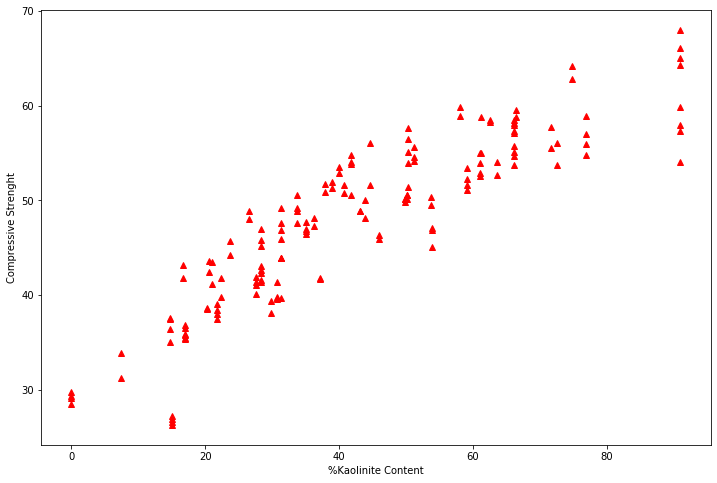

In [17]:
# Show points using matplotlib.pyplot library
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(data_28.iloc[:,0],data_28.iloc[:,1],'r^')
plt.xlabel('%Kaolinite Content')
plt.ylabel('Compressive Strenght')

plt.show()

In [18]:
# Libraries for creating and validating models
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error
from sklearn.model_selection import LeaveOneOut, cross_val_predict, cross_val_score

In [19]:
x  = data_28.iloc[:,0]
x_2= np.array([x, x**2]).T
y  = data_28.iloc[:,1]

In [20]:
# Same function than before but adapted for degree two case
def leave_one_out_validation(X, y, model=LinearRegression()):
    # Train and show the model
    model.fit(X, y) 
    
    # This could be generalized but degree n >= 3 leads to overfitting!
    print('f(x) = {0} + {1}*x + {2}*x^2'.format(model.intercept_, model.coef_[0], model.coef_[1]))
        
    # Get the list of predictions obtained while validating
    predicted = cross_val_predict(model, X, y, cv=LeaveOneOut())
    
    # Plot the results
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(X[:,0], np.dot(X,model.coef_) + model.intercept_,'r-')
    ax.scatter(X[:,0], y, edgecolors=(0, 0, 0))
    ax.set_xlabel('% Kaolinite content')
    ax.set_ylabel('Compressive strength')
    plt.show()
    
    # Metrics for the model
    print("MSE: {}".format(mean_squared_error(y, predicted)))
    print("R^2: {}".format(model.score(X,y)))

f(x) = 27.17798396195338 + 0.6553925166472869*x + -0.0031598648880762545*x^2


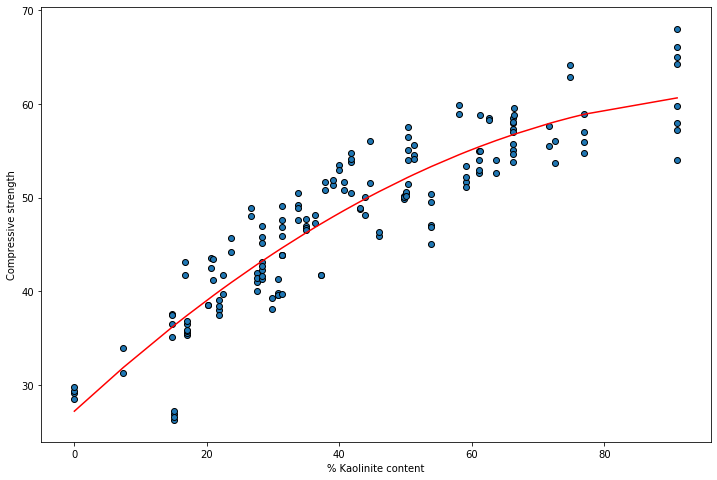

MSE: 13.033203872484696
R^2: 0.8372453586563796


In [21]:
leave_one_out_validation(x_2, y)

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
data_28.rename(columns = {'Calcined kaolinite content (%)':'Kaolinite_content'}, inplace = True)
data_28.insert(1, 'Kaolinite_content_square', data_28['Kaolinite_content']**2, True)

In [25]:
data_28

,Kaolinite_content,Kaolinite_content_square,day_28
0,0,0,29.11875
1,0,0,28.45625
2,0,0,29.35000
3,0,0,29.75000
160,7.4,54.76,33.88125
...,...,...,...
30,91,8281,59.81875
31,91,8281,57.93750
27,91,8281,64.26875
26,91,8281,64.97500


In [27]:
# Day 28
mod = smf.ols(formula='day_28 ~ Kaolinite_content + Kaolinite_content_square', data=data_28)
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 day_28   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     73.03
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           7.32e-65
Time:                        11:47:26   Log-Likelihood:                -290.87
No. Observations:                 160   AIC:                             683.7
Df Residuals:                     109   BIC:                             840.6
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         29.1687      0.903     32.308      0.000      27.379      30.958
Kaolinite_content[T.7.4]                           1.7047      0.782      2.180      0.031       0.155       3.254
Kaolinite_content[T.14.8]                          3.7453      0.638      5.867      0.000       2.480       5.011
Kaolinite_content[T.15]                           -1.2117      0.638     -1.898      0.060      -2.477       0.054
Kaolinite_content[T.16.7]                          6.6391      0.782      8.491      0.000       5.089       8.189
Kaolinite_content[T.17]                            3.4026      0.583      5.839      0.000       2.248       4.558
Kaolinite_content[T.20.2]                          4.6879      0.782      5.996      0.000       3.138       6.238
Kaolinite_content[T.20.6]                          6.9203      0.782      8.851      0.000       5.371       8.470
Kaolinite_content[T.21]                            6.5625      0.782      8.393      0.000       5.013       8.112
Kaolinite_content[T.21.8]                          4.5328      0.638      7.100      0.000       3.268       5.798
Kaolinite_content[T.22.4]                          5.7906      0.782      7.406      0.000       4.241       7.340
Kaolinite_content[T.23.7]                          7.8977      0.782     10.101      0.000       6.348       9.447
Kaolinite_content[T.26.6]                          9.6382      0.782     12.327      0.000       8.089      11.188
Kaolinite_content[T.27.6]                          5.9742      0.638      9.358      0.000       4.709       7.240
Kaolinite_content[T.28.3]                          7.2211      0.553     13.061      0.000       6.125       8.317
Kaolinite_content[T.29.8]                          4.7828      0.782      6.117      0.000       3.233       6.332
Kaolinite_content[T.30.8]                          5.4656      0.638      8.561      0.000       4.200       6.731
Kaolinite_content[T.31.3]                          9.0930      0.638     14.243      0.000       7.828      10.358
Kaolinite_content[T.31.4]                          6.8258      0.638     10.692      0.000       5.560       8.091
Kaolinite_content[T.33.8]                          9.9422      0.638     15.574      0.000       8.677      11.207
Kaolinite_content[T.35]                            8.9031      0.638     13.946      0.000       7.638      10.168
Kaolinite_content[T.36.3]                          9.2578      0.782     11.841      0.000       7.708      10.807
Kaolinite_content[T.37.2]                          6.2797      0.782      8.032      0.000       4.730       7.829
Kaolinite_content[T.37.9]                         11.0531      0.782     14.137      0.000   

In [28]:
# TODO: Represent the confidence intervals!